# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [19]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.4 🚀 Python-3.8.10 torch-1.13.0+cu117 CPU (Intel Core(TM) i5-8250U 1.60GHz)
Setup complete ✅ (8 CPUs, 7.5 GB RAM, 452.6/456.9 GB disk)


# Train YOLOv8 model

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [62]:
%load_ext tensorboard
%tensorboard --logdir .

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/home/ericles/.local/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/home/ericles/.local/lib/python3.8/site-packages/tensorboard/main.py", line 27, in <module>
    from tensorboard import default
  File "/home/ericles/.local/lib/python3.8/site-packages/tensorboard/default.py", line 33, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/home/ericles/.local/lib/python3.8/site-packages/tensorboard/plugins/audio/audio_plugin.py", line 25, in <module>
    from tensorboard.data import provider
  File "/home/ericles/.local/lib/python3.8/site-packages/tensorboard/data/__init__.py", line 17, in <module>
    from tensorboard.data import experimental  # noqa: F401
  File "/home/ericles/.local/lib/python3.8/site-packages/tensorboard/data/experimental/__init__.py", line 17, in <module>
    from tensorboard.data.experime

In [1]:
from ultralytics import YOLO
from torchinfo import summary

import matplotlib.pyplot as plt 
import matplotlib.patches as patches

from PIL import Image 
import numpy as np

import os

In [2]:
model = YOLO('yolov8n.pt')  # carrega modelo pre-treinado
#print(model)
summary(model)

Layer (type:depth-idx)                                  Param #
YOLO                                                    --
├─DetectionModel: 1-1                                   --
│    └─Sequential: 2-1                                  --
│    │    └─Conv: 3-1                                   (464)
│    │    └─Conv: 3-2                                   (4,672)
│    │    └─C2f: 3-3                                    (7,360)
│    │    └─Conv: 3-4                                   (18,560)
│    │    └─C2f: 3-5                                    (49,664)
│    │    └─Conv: 3-6                                   (73,984)
│    │    └─C2f: 3-7                                    (197,632)
│    │    └─Conv: 3-8                                   (295,424)
│    │    └─C2f: 3-9                                    (460,288)
│    │    └─SPPF: 3-10                                  (164,608)
│    │    └─Upsample: 3-11                              --
│    │    └─Concat: 3-12                           


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/surf.jpg: 448x640 1 person, 1 surfboard, 308.3ms
Speed: 9.6ms preprocess, 308.3ms inference, 276.5ms postprocess per image at shape (1, 3, 448, 640)
Detectados 2 objetos.


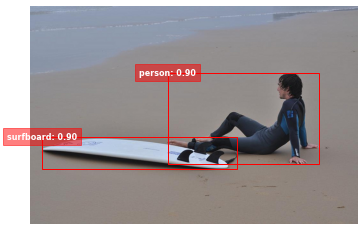


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/motorbike.jpg: 448x640 1 person, 1 motorcycle, 340.9ms
Speed: 10.9ms preprocess, 340.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Detectados 2 objetos.


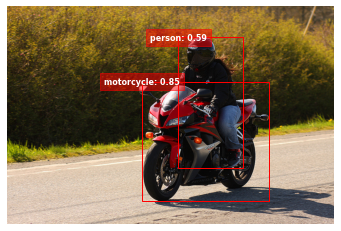


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/eagle.jpg: 448x640 1 bird, 95.2ms
Speed: 6.1ms preprocess, 95.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Detectado 1 objeto.


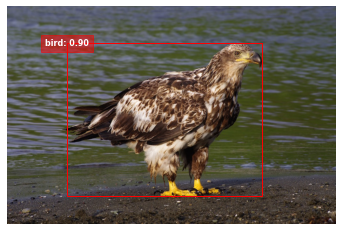


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/dog2.jpg: 448x640 4 persons, 1 bicycle, 1 dog, 118.1ms
Speed: 23.5ms preprocess, 118.1ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Detectados 6 objetos.


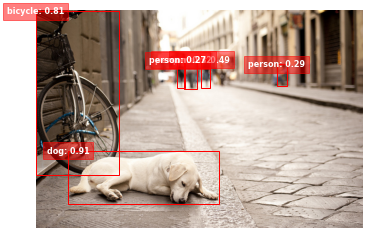


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/person.jpg: 448x640 1 person, 1 dog, 1 horse, 122.7ms
Speed: 2.1ms preprocess, 122.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Detectados 3 objetos.


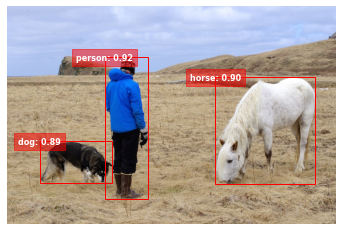


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 9 bowls, 8 carrots, 1 dining table, 121.1ms
Speed: 1.9ms preprocess, 121.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Detectados 19 objetos.


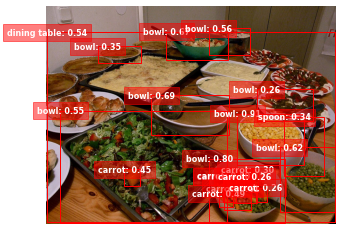


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/city_scene.jpg: 416x640 12 persons, 1 bicycle, 3 cars, 1 bus, 4 trucks, 5 traffic lights, 111.7ms
Speed: 6.2ms preprocess, 111.7ms inference, 4.8ms postprocess per image at shape (1, 3, 416, 640)
Detectados 26 objetos.


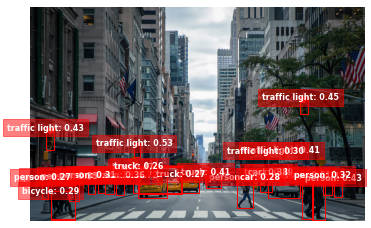


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/giraffe.jpg: 640x640 1 zebra, 1 giraffe, 4537.7ms
Speed: 36.4ms preprocess, 4537.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Detectados 2 objetos.


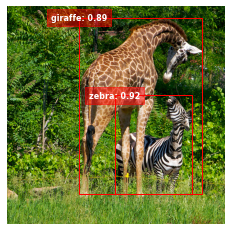


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/cat.jpg: 480x640 1 cat, 687.4ms
Speed: 19.9ms preprocess, 687.4ms inference, 8.1ms postprocess per image at shape (1, 3, 480, 640)
Detectado 1 objeto.


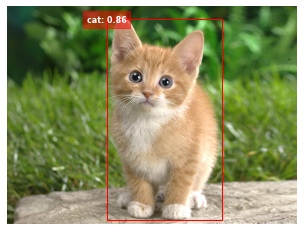


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/horses.jpg: 448x640 5 horses, 209.7ms
Speed: 7.8ms preprocess, 209.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Detectados 5 objetos.


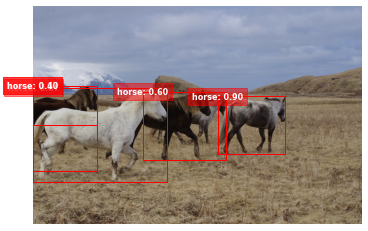


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/dog.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 273.1ms
Speed: 24.4ms preprocess, 273.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Detectados 4 objetos.


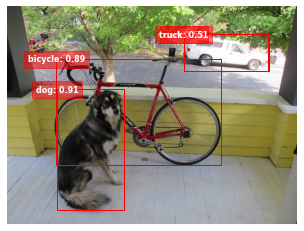


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/wine.jpg: 640x448 1 bottle, 1 wine glass, 2 chairs, 1 dining table, 150.0ms
Speed: 16.6ms preprocess, 150.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)
Detectados 5 objetos.


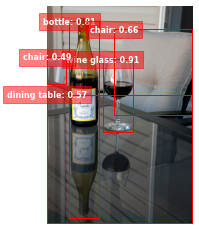

In [3]:
for filename in os.listdir('images'):
    if filename.endswith(".jpg"):
        image = os.path.join('images', filename)
        img = np.array(Image.open(image), dtype=np.uint8)

        # Create figure and axes 
        fig, ax = plt.subplots(1) 
  
        # Display the image 
        ax.imshow(img)
        plt.axis('off')
        #ax.get_xaxis().set_visible(False)
        #ax.get_yaxis().set_visible(False)
  
        results = model.predict(image, iou=.5)  # predict on an image
        object_count = len(results[0])
        plural = 's' if object_count > 1 else ''
        print(f'Detectado{plural} {object_count} objeto{plural}.')
    
        for result in results:
            boxes = result.boxes
            xyxys = boxes.xyxy
    
            for i, xyxy in enumerate(xyxys): 
                rect = patches.Rectangle((int(xyxy[0]), int(xyxy[1])), 
                                         int(xyxy[2] - xyxy[0]),
                                         int(xyxy[3] - xyxy[1]), linewidth=1, 
                                         edgecolor='r', facecolor="none")
            
                cls = int(result.boxes.cls[i].item())
                name = result.names[cls]
                confidence = float(result.boxes.conf[i].item())
                #print('Nível de confiança para {name}: {confidence:.2f}'.format(name=name, confidence=confidence))

                rx, ry = rect.get_xy()
                cx = rx# + rect.get_width()/2.0
                cy = ry# + rect.get_height()/8.0
                l = ax.annotate(
                    name + ': {confidence:.2f}'.format(confidence=confidence),
                    (cx, cy),
                    fontsize=8,
                    fontweight="bold",
                    color="white",
                    ha='center',
                    va='center'
                  )
                l.set_bbox(dict(facecolor='r', alpha=0.5, edgecolor='red'))
                ax.add_patch(rect) 
        
        plt.savefig(os.path.join('images', f'detect_{filename}'))
        plt.show() 

# Efeito do IoU nos resultados

Realiza validação no COCO128, com mesmas configurações usadas para treino.

Ao executar `model.val`, são computadas diversas métricas para validação.

In [3]:
results = []
for v in [x/100.0 for x in range(50, 100, 5)]:
    print(f'iou = {v}') 
    results.append(model.val(iou=v))

iou = 0.5
Ultralytics YOLOv8.2.100 🚀 Python-3.8.10 torch-1.13.0+cu117 CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [08:30<00:00,  1.63s/it]


                   all       5000      36335      0.636      0.487      0.531      0.369
                person       2693      10777      0.774      0.684      0.758      0.511
               bicycle        149        314      0.707      0.399      0.472       0.26
                   car        535       1918      0.661      0.528      0.573      0.361
            motorcycle        159        367      0.744      0.572      0.678      0.411
              airplane         97        143      0.795      0.783      0.837      0.651
                   bus        189        283      0.737      0.657      0.748      0.621
                 train        157        190      0.798      0.789       0.84      0.645
                 truck        250        414      0.532      0.413      0.443      0.292
                  boat        121        424      0.593      0.316      0.397      0.205
         traffic light        191        634      0.647      0.358      0.417      0.208
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [07:44<00:00,  1.49s/it]


                   all       5000      36335      0.636      0.486       0.53       0.37
                person       2693      10777      0.773      0.682      0.757      0.513
               bicycle        149        314      0.695      0.398      0.469       0.26
                   car        535       1918      0.662      0.527      0.572      0.362
            motorcycle        159        367      0.749      0.586      0.682      0.414
              airplane         97        143      0.799      0.783      0.843      0.653
                   bus        189        283      0.735      0.654      0.746       0.62
                 train        157        190      0.801      0.789      0.838      0.644
                 truck        250        414      0.541      0.408      0.444      0.294
                  boat        121        424        0.6      0.315        0.4      0.209
         traffic light        191        634      0.645      0.358      0.419       0.21
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [07:43<00:00,  1.48s/it]


                   all       5000      36335      0.634      0.483      0.528      0.371
                person       2693      10777      0.768      0.681      0.755      0.514
               bicycle        149        314      0.688      0.401      0.468      0.263
                   car        535       1918      0.657      0.521      0.571      0.363
            motorcycle        159        367      0.732      0.586      0.679      0.416
              airplane         97        143      0.788      0.776       0.84      0.654
                   bus        189        283      0.736      0.654      0.745      0.619
                 train        157        190      0.804      0.779      0.838      0.644
                 truck        250        414      0.541      0.403      0.442      0.294
                  boat        121        424      0.605      0.309      0.393      0.209
         traffic light        191        634      0.643      0.358      0.416       0.21
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [08:01<00:00,  1.54s/it]


                   all       5000      36335      0.634      0.479      0.525      0.371
                person       2693      10777      0.763      0.678      0.751      0.515
               bicycle        149        314      0.672      0.399      0.465      0.264
                   car        535       1918      0.656       0.52      0.566      0.364
            motorcycle        159        367      0.723      0.586      0.668      0.416
              airplane         97        143      0.818      0.776      0.838      0.652
                   bus        189        283      0.741      0.648      0.742      0.619
                 train        157        190      0.806      0.779      0.837      0.645
                 truck        250        414      0.543      0.401      0.438      0.293
                  boat        121        424      0.599      0.307      0.386      0.212
         traffic light        191        634      0.642      0.347      0.413       0.21
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [09:36<00:00,  1.84s/it]


                   all       5000      36335      0.633      0.475      0.521      0.371
                person       2693      10777      0.754      0.673      0.745      0.514
               bicycle        149        314      0.687      0.392      0.457      0.265
                   car        535       1918      0.646      0.515      0.561      0.364
            motorcycle        159        367       0.71       0.58      0.655      0.414
              airplane         97        143      0.814      0.766      0.832      0.653
                   bus        189        283      0.746      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.834      0.646
                 truck        250        414      0.549      0.399      0.435      0.293
                  boat        121        424      0.583        0.3      0.377       0.21
         traffic light        191        634      0.644      0.345      0.409      0.211
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [09:25<00:00,  1.81s/it]


                   all       5000      36335       0.63      0.468      0.515       0.37
                person       2693      10777      0.744      0.666      0.736      0.513
               bicycle        149        314      0.646      0.382      0.446      0.261
                   car        535       1918      0.646      0.508      0.554      0.363
            motorcycle        159        367      0.688      0.575      0.649      0.412
              airplane         97        143      0.794      0.757      0.831      0.654
                   bus        189        283      0.749       0.64      0.734      0.619
                 train        157        190      0.783      0.768      0.827      0.645
                 truck        250        414      0.546      0.384      0.429      0.293
                  boat        121        424      0.577      0.292      0.365      0.207
         traffic light        191        634      0.636      0.339      0.402       0.21
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [09:17<00:00,  1.78s/it]


                   all       5000      36335      0.622      0.461      0.506      0.367
                person       2693      10777      0.723      0.659      0.723      0.509
               bicycle        149        314      0.622      0.373      0.431      0.257
                   car        535       1918      0.643      0.502      0.544       0.36
            motorcycle        159        367      0.668      0.569      0.632      0.408
              airplane         97        143      0.796      0.737      0.824      0.656
                   bus        189        283       0.76      0.633      0.731      0.617
                 train        157        190      0.772      0.768      0.817      0.639
                 truck        250        414      0.543      0.377      0.421      0.288
                  boat        121        424      0.566      0.281       0.35      0.202
         traffic light        191        634      0.604      0.331      0.387      0.206
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [09:21<00:00,  1.79s/it]


                   all       5000      36335      0.609       0.45      0.493       0.36
                person       2693      10777       0.69      0.645      0.702      0.501
               bicycle        149        314      0.604      0.366      0.408      0.249
                   car        535       1918       0.62      0.486      0.526      0.354
            motorcycle        159        367      0.635      0.569      0.611      0.399
              airplane         97        143      0.744      0.731      0.809      0.647
                   bus        189        283      0.774      0.622      0.722      0.612
                 train        157        190      0.736      0.762      0.799       0.63
                 truck        250        414      0.561      0.358       0.41      0.282
                  boat        121        424      0.524       0.25      0.327      0.193
         traffic light        191        634      0.575      0.313      0.366      0.198
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [09:15<00:00,  1.78s/it]


                   all       5000      36335      0.596      0.424      0.469      0.348
                person       2693      10777      0.644      0.613      0.663      0.481
               bicycle        149        314      0.604      0.325      0.378      0.237
                   car        535       1918      0.602      0.453      0.495       0.34
            motorcycle        159        367      0.592       0.52      0.564      0.376
              airplane         97        143      0.743      0.727      0.778      0.628
                   bus        189        283      0.779      0.601        0.7      0.599
                 train        157        190      0.649      0.737      0.764       0.61
                 truck        250        414      0.562      0.307      0.388      0.269
                  boat        121        424      0.521      0.231      0.296      0.178
         traffic light        191        634      0.549      0.295      0.334      0.186
          fire hydran

val: Scanning /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [10:17<00:00,  1.97s/it] 


                   all       5000      36335      0.501      0.389      0.402      0.306
                person       2693      10777       0.49      0.567      0.558       0.42
               bicycle        149        314      0.496      0.283      0.309        0.2
                   car        535       1918      0.491      0.404      0.414      0.296
            motorcycle        159        367      0.442      0.471      0.426      0.295
              airplane         97        143      0.538      0.678       0.67      0.556
                   bus        189        283      0.666      0.576      0.638      0.554
                 train        157        190      0.457      0.732      0.656      0.536
                 truck        250        414      0.491      0.249      0.322      0.228
                  boat        121        424      0.438      0.193       0.23      0.144
         traffic light        191        634      0.421      0.251       0.26       0.15
          fire hydran

## Gera caixas para diferentes limiares de IoU para uma imagem especificada

Imagem images/food.jpg

image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 9 bowls, 8 carrots, 1 dining table, 194.6ms
Speed: 1.9ms preprocess, 194.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.5
Detectados 19 objetos.


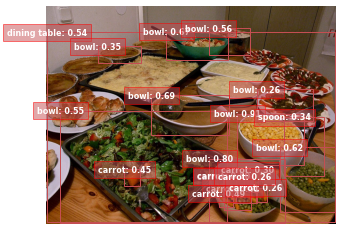


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 9 bowls, 8 carrots, 1 dining table, 137.5ms
Speed: 1.7ms preprocess, 137.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.55
Detectados 19 objetos.


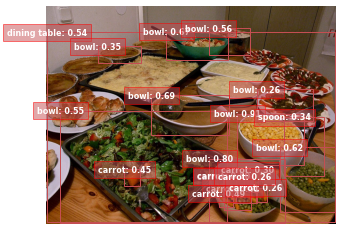


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 9 bowls, 8 carrots, 1 dining table, 128.3ms
Speed: 14.8ms preprocess, 128.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.6
Detectados 19 objetos.


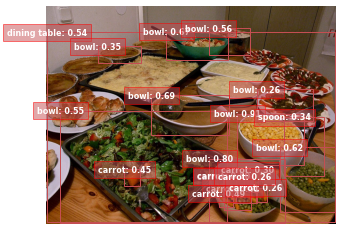


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 10 bowls, 8 carrots, 1 dining table, 167.7ms
Speed: 4.9ms preprocess, 167.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.65
Detectados 20 objetos.


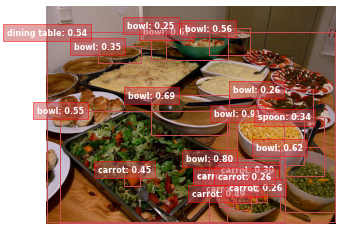


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 10 bowls, 10 carrots, 1 dining table, 126.0ms
Speed: 1.6ms preprocess, 126.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.7
Detectados 22 objetos.


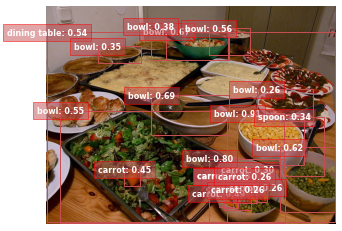


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 10 bowls, 10 carrots, 1 dining table, 234.3ms
Speed: 20.5ms preprocess, 234.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.75
Detectados 22 objetos.


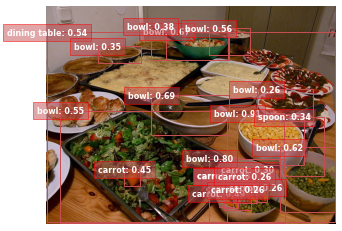


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 1 spoon, 10 bowls, 11 carrots, 1 dining table, 205.5ms
Speed: 17.7ms preprocess, 205.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.8
Detectados 23 objetos.


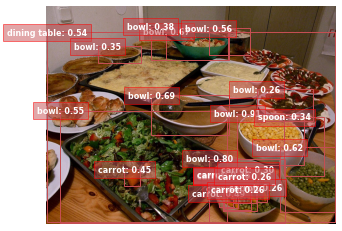


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 2 spoons, 10 bowls, 14 carrots, 1 dining table, 155.0ms
Speed: 1.9ms preprocess, 155.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.85
Detectados 27 objetos.


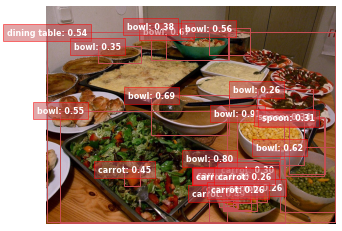


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 2 spoons, 13 bowls, 16 carrots, 1 dining table, 122.1ms
Speed: 2.5ms preprocess, 122.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.9
Detectados 32 objetos.


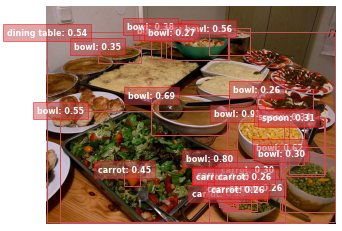


image 1/1 /home/ericles/Projetos/Unicamp/deepL/trabalho-1/código/images/food.jpg: 480x640 4 spoons, 19 bowls, 24 carrots, 2 dining tables, 171.8ms
Speed: 45.1ms preprocess, 171.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
IoU: 0.95
Detectados 49 objetos.


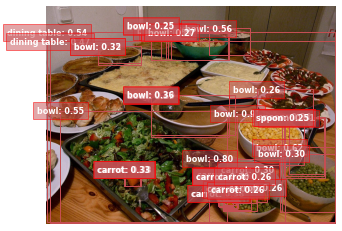

In [18]:
image_name = 'food.jpg'
image = os.path.join('images', image_name)
img = np.array(Image.open(image), dtype=np.uint8)

print(f'Imagem {image}')


for iou in [x/100.0 for x in range(50, 100, 5)]:
    # Create figure and axes 
    fig, ax = plt.subplots(1) 

    # Display the image 
    ax.imshow(img)
    plt.axis('off')
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    results = model.predict(image, iou=iou)  # predict on an image
    object_count = len(results[0])
    plural = 's' if object_count > 1 else ''

    print(f'IoU: {iou}')
    print(f'Detectado{plural} {object_count} objeto{plural}.')

    for result in results:
        boxes = result.boxes
        xyxys = boxes.xyxy

        for i, xyxy in enumerate(xyxys): 
            rect = patches.Rectangle((int(xyxy[0]), int(xyxy[1])), 
                                     int(xyxy[2] - xyxy[0]),
                                     int(xyxy[3] - xyxy[1]), linewidth=1, 
                                     edgecolor='r', facecolor="none")

            cls = int(result.boxes.cls[i].item())
            name = result.names[cls]
            confidence = float(result.boxes.conf[i].item())
            #print('Nível de confiança para {name}: {confidence:.2f}'.format(name=name, confidence=confidence))

            rx, ry = rect.get_xy()
            cx = rx
            cy = ry
            l = ax.annotate(
                name + ': {confidence:.2f}'.format(confidence=confidence),
                (cx, cy),
                fontsize=8,
                fontweight="bold",
                color="white",
                ha='center',
                va='center'
              )
            l.set_bbox(dict(facecolor='r', alpha=0.5, edgecolor='red'))
            ax.add_patch(rect) 

    #plt.savefig(os.path.join('images', f'detect_{iou*100}_{image_name}'))
    plt.show() 